In [1]:
!git clone --recurse-submodules https://github.com/fastai/fastai
!pip install -e "fastai[dev]"

Cloning into 'fastai'...
remote: Enumerating objects: 14494, done.
remote: Counting objects: 100% (735/735), done.
remote: Compressing objects: 100% (399/399), done.
remote: Total 14494 (delta 471), reused 487 (delta 326), pack-reused 13759
Receiving objects: 100% (14494/14494), 649.88 MiB | 27.13 MiB/s, done.
Resolving deltas: 100% (11296/11296), done.
Obtaining file:///content/fastai
     |████████████████████████████████| 56 kB 156 kB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 919 kB 16.7 MB/s 
     |████████████████████████████████| 232 kB 48.3 MB/s 
     |████████████████████████████████| 2.8 MB 50.4 MB/s 
     |████████████████████████████████| 1.2 MB 35.9 MB/s 
     |████████████████████████████████| 2.0 MB 45.2 MB/s 
     |████████████████████████████████| 556 kB 48.6 MB/s 
     |████████████████████████████████| 1.4 MB 35.6 MB/s 
     |████████████████████████████████| 1.7 MB 37.5 MB/s 
     |█████████████████████████████

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:

import numpy as np
import fastai
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
from fastai.vision.all import *
from fastai.imports import *
from fastai.vision.data import *
from fastai import *

In [5]:
path = '/content/drive/My Drive/Colab Notebooks/datasets/snake'
print(path)

/content/drive/My Drive/Colab Notebooks/datasets/snake


In [8]:
np.random.seed(42)
data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2, item_tfms=RandomResizedCrop(512, min_scale=0.75),
                                    bs=32,batch_tfms=[*aug_transforms(size=226, max_warp=0), Normalize.from_stats(*imagenet_stats)],num_workers=0)

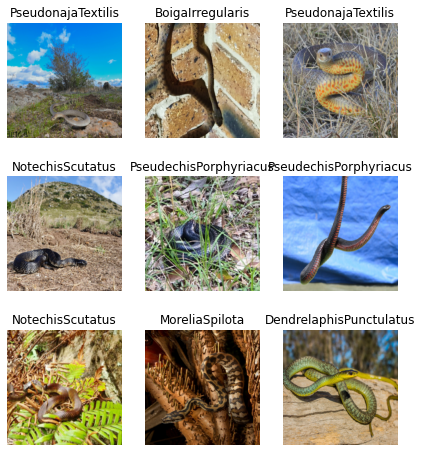

In [9]:
data.show_batch(nrows=3, figsize=(7,8))

In [10]:
learn = cnn_learner(data, resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.835756,1.055106,0.314035,26:00
1,1.308306,0.847476,0.243860,01:48
2,0.940435,0.785745,0.256140,01:48
3,0.691144,0.750927,0.226316,01:48


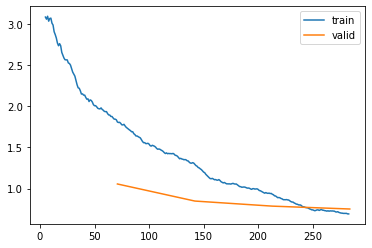

In [12]:
learn.recorder.plot_loss()

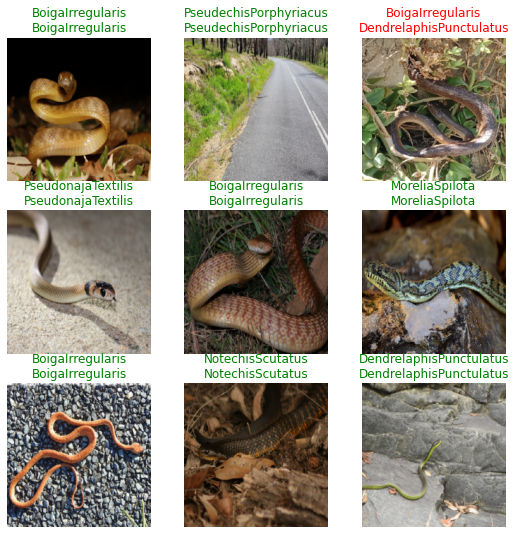

In [16]:
learn.show_results()

In [14]:
learn.export("/content/drive/My Drive/Colab Notebooks/Snake.pkl")